In [1]:
#ML_PCA

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
iris = datasets.load_iris()
X, y = iris.data, iris.target


In [7]:
class PCA:
    def __init__(self, k_components):
        self.K = k_components
        self.mean = None
        self.components = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis = 0)
        X = X - self.mean
        
        #In the covariance matrix, we take column vectors not row vectors(which is generally taken in python.)
        #Long story Short, in np.cov(), we use the mathematical convention.
        
        cov = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        self.components = eigenvectors[0:self.K]
    
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

In [8]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)
print(X.shape)
print(X_projected.shape)

(150, 4)
(150, 2)


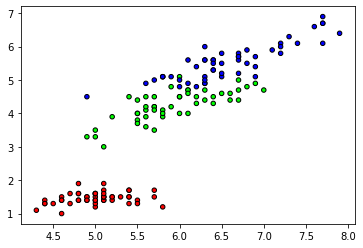

In [14]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(X[:, 0], X[:, 2], c = y, cmap = cmap, s = 20, edgecolor = 'k')


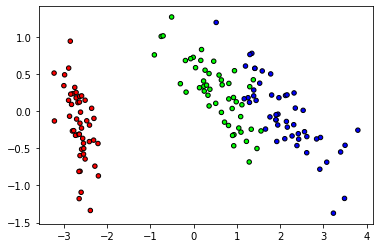

In [11]:
plt.scatter(X_projected[:, 0], X_projected[:, 1], c = y, cmap = cmap, s = 20, edgecolor = 'k')